In [1]:
import numpy as np
import pandas as pd
import csv
import os
from matplotlib import pyplot as plt
from sklearn import mixture
from scipy.signal import savgol_filter

In [45]:
def calc(filepath):
#     for root, dirs, files in os.walk(filepath):
#         for file in files:
#             if os.path.splitext(file)[0] == 'Sample Table':
#                 df_samples = pd.read_csv(root + '\\' + file, engine = 'python', sep = ';')
    
    new_folder = filepath + r'\Calculated'
    try:
        os.makedirs(new_folder)
    except:
        pass
    
#     df_result = df_samples
    A550 = []
    T550 = []
    Thickness550 = []
#     df_result.drop(columns = [' Description', ' Type', ' CBDep'], inplace = True)
#     for item in df_samples['Sample ID']:
    for root, dirs, files in os.walk(filepath):
        for file in files:
            if '.Sample.Raw.csv' in file:
                fig,ax = plt.subplots(figsize = (6,6))
                df = pd.read_csv(root + '\\' + file, engine = 'python', sep = ';')
                df.columns = ['nm', 'A']
                df.query('nm >= 200 & nm <= 2500', inplace = True)
                pd.DataFrame.reset_index(df, drop = True, inplace = True)
                q = df['A'].iloc[0]
                df.query("A >= @q", inplace = True)
                pd.DataFrame.reset_index(df, drop = True, inplace = True)
                df.columns = ['Wavelength,nm', 'A,a.u.']
                diff_1800 = df['A,a.u.'].iloc[df.index[df['Wavelength,nm'] == 1800].tolist()[0]] - df['A,a.u.'].iloc[df.index[df['Wavelength,nm'] == 1802].tolist()[0]]
                for i in range (0, df.index[df['Wavelength,nm'] == 1800].tolist()[0]):
                    df['A,a.u.'].iloc[i] += diff_1800
                diff_860 = df['A,a.u.'].iloc[df.index[df['Wavelength,nm'] == 860].tolist()[0]] - df['A,a.u.'].iloc[df.index[df['Wavelength,nm'] == 862].tolist()[0]]
                for i in range (0, df.index[df['Wavelength,nm'] == 860].tolist()[0]):
                    df['A,a.u.'].iloc[i] += diff_860
                add = np.array([item/np.max(df['A,a.u.']) for item in df['A,a.u.']])
                df['Normalized A, a.u.'] = add
                add = np.array([10**(-item)*100 for item in df['A,a.u.']])
                df['T,%'] = add
                df['A,a.u.'] = savgol_filter(df['A,a.u.'], window_length = 75, polyorder = 5)
                A550.append(df['A,a.u.'].iloc[df.index[df['Wavelength,nm'] == 550].tolist()[0]])
                T550.append(df['T,%'].iloc[df.index[df['Wavelength,nm'] == 550].tolist()[0]])
                Thickness550.append(417*df['A,a.u.'].iloc[df.index[df['Wavelength,nm'] == 550].tolist()[0]])
                pd.DataFrame.to_csv(df, path_or_buf = new_folder + '//' + file.replace('Raw', 'Calc'), sep = ';', header = True, index = False)
                plt.plot(df['Wavelength,nm'], df['A,a.u.'], label = os.path.splitext(file)[0].replace('.Sample.Raw', ''))
                plt.xlabel('\u03BB, nm')
                plt.ylabel('A,a.u.')
                plt.title(os.path.splitext(file)[0].replace('.Sample.Raw', ''))
                fig.tight_layout(pad = 1)
                fig.savefig((new_folder + '//' + os.path.splitext(file)[0].replace('.Sample.Raw', '') + '.png'), format = 'png', dpi = 600)
                plt.clf()
                plt.close(fig)
#     df_result['A550,a.u.'] = A550
#     df_result['T550,%'] = T550
#     df_result['Thickness'] = Thickness550
#     pd.DataFrame.to_csv(df_result, path_or_buf = new_folder + '//' + 'Result.csv', sep = ';', header = True, index = False)

In [46]:
df = calc(r'C:\Users\kpebe\OneDrive\Рабочий стол\Optics\Pristine regimes 1-5')

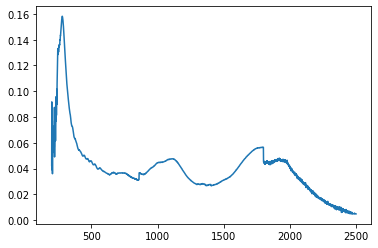

In [36]:
plt.plot(df['Wavelength,nm'], df['A,a.u.'])
# df.index[df['Wavelength,nm'] == 2200]

In [56]:
data = pd.read_csv(r'C:\Users\kpebe\OneDrive\Рабочий стол\Grigoriy\600C\Calculated\\Pristine 10 min.Sample.Calc.csv', engine = 'python', sep = ';')

In [57]:
data.drop(columns = ['Normalized A, a.u.', 'T, %'], inplace = True)

In [58]:
estimator = mixture.GaussianMixture(n_components = 3)

In [59]:
estimator_bayes = mixture.BayesianGaussianMixture(n_components = 3)

In [60]:
train_labels = np.reshape(np.array(data['Wavelength, nm']), (-1,1))
train_data = np.reshape(np.array(data['A, a.u.']), (-1,1))
arr = np.transpose(np.vstack((train_labels, train_data)))

In [61]:
pred = estimator.fit(X = train_data, y = train_labels)

In [40]:
k = pred.sample(n_samples = 1151)

In [41]:
k[0]

array([[0.02043971],
       [0.02590892],
       [0.04711531],
       ...,
       [0.10083384],
       [0.0865148 ],
       [0.07484596]])

In [42]:
x = np.linspace(200,2500,2)

In [43]:
y = np.exp(pred.score(x))

ValueError: Expected 2D array, got 1D array instead:
array=[ 200. 2500.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [44]:
np.random.seed(2)
x = np.concatenate([np.random.normal(0,2,2000), np.random.normal(5,5,2000), np.random.normal(3,0.5,600)])

In [45]:
print(x)

[-0.83351569 -0.11253365 -4.27239219 ...  3.3388401   2.95246163
  2.55136449]


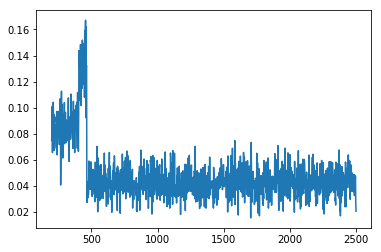

C:\Users\kpebe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\kpebe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 2800.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\kpebe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 3400.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\kpebe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 4000.
  warnings.warn(errors[info][0], RuntimeWarning)


[ 1.07897485e+00  2.34365500e+03 -8.36725252e-01  9.76275123e+02
  1.12009514e+03 -1.79201726e-01 -2.49008088e+02  4.34599739e+01
  1.09399994e+01  1.07868401e+02  2.03977921e+02 -1.08802123e+01
 -1.86258701e+01  2.44856904e+02 -2.91682116e-01  1.53174544e+01
 -5.95546369e+02 -9.59589263e+00  3.92190415e+02  2.04675100e+02
  9.09202234e+00  1.66430964e+01]


C:\Users\kpebe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 4600.
  warnings.warn(errors[info][0], RuntimeWarning)


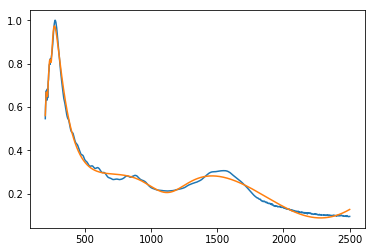

In [103]:
from scipy.optimize import leastsq

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    assert not ( len( paramsRest ) % 3 )
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range( 0, len( paramsRest ), 3 ) ] )

def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

xData = np.array(data['Wavelength, nm'])
yData = np.array(data['A, a.u.']) / max(np.array(data['A, a.u.']))

generalWidth = 1

yDataLoc = yData
startValues = [ max( yData ) ]
counter = 0

while max( yDataLoc ) - min( yDataLoc ) > .1:
    counter += 1
    if counter > 50: ### max 20 peak...emergency break to avoid infinite loop
        break
    minP = np.argmin( yDataLoc )
    minY = yData[ minP ]
    x0 = xData[ minP ]
    startValues += [ x0, minY - max( yDataLoc ), generalWidth ]
    popt, ier = leastsq( res_multi_lorentz, startValues, args=( xData, yData ) )
    yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]

print(popt)
testData = [ multi_lorentz(x, popt ) for x in xData ]

fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()

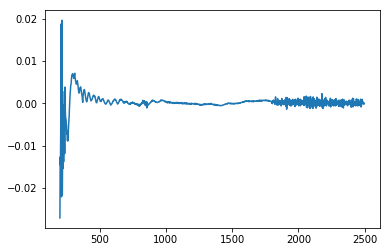

In [66]:
plt.plot(data['Wavelength, nm'][1:], np.diff(data['A, a.u.'], n = 1))

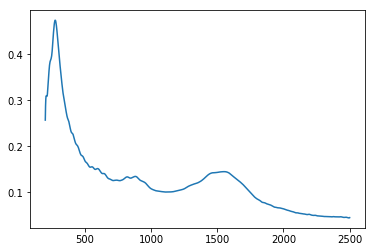

In [102]:
plt.plot(data['Wavelength, nm'][:],x)

In [68]:
from scipy.signal import savgol_filter

In [98]:
x = savgol_filter(data['A, a.u.'], window_length = 51, polyorder = 10)

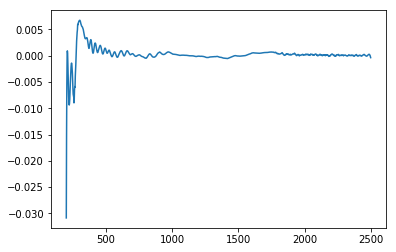

In [99]:
plt.plot(data['Wavelength, nm'][1:], np.diff(x, n = 1))

In [101]:
i = 0
for item in np.diff(x, n = 1):
    if item == 0:
        i+=1
print (i)
i = 0

0
